In [0]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
#!pip3 install --upgrade seaborn cufflinks plotly
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Sharing homework on `planets` dataset



`planets` is a new dataset from seaborn that we have never explored. You can find the code to run it in the cell below.

This file was produced by the NASA Exoplanet Archive  http://exoplanetarchive.ipac.caltech.edu
Sat Feb 15 11:18:19 2014

* `method`:              `Discovery Method`
* `number`:              `Number of Planets in System`
* `orbital_period`:      `Orbital Period (val)`
* `mass`:                `Planet M*sin(i) [jup] (val)`
* `distance`:            `Distance (val)`
* `year`:                `Year of Discovery`
---


* Questions
* Hypothesis
* Verify by plotting

In [0]:
planets = sns.load_dataset('planets')

In [4]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


# Example Solution

**Question**: Have the most effective discovery method for shorter distance and for longer distance been different? If they were different, which method was the most effective for discovering the nearer planets and which for the farther away ones?

**Hypothesis**: Depending on the methods the distribution of distance will be different. The radial velocity will be most effective for the shorter ones and the microlensing method for the farther away ones.

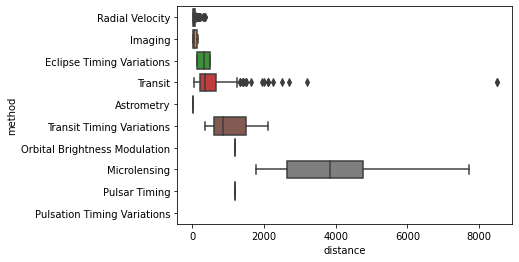

In [0]:
sns.boxplot(x='distance', y='method', data=planets)

It seems to be right that the most effective method for the discovery of planets are different depending on distance. Also Microlensing seems to be most effective for the farther distance. But it is hard to compare radial velocity and imaging for the shorter distance. 

**Subsequent Question**: How do we compare their distribution? Is it possible that one of them has more accumulated numbers only because this methods is developed earlier?

**Hypothesis**: Their distribution will be similar in a closer look. The Radial Velocity method has been historically the most efficient method to find planets nearby but the Imaging method is more effective now.

In [0]:
short = planets[planets['method'].isin(['Radial Velocity', 'Imaging'])]
short.head(100)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.30000,7.100,77.40,2006
1,Radial Velocity,1,874.77400,2.210,56.95,2008
2,Radial Velocity,1,763.00000,2.600,19.84,2011
3,Radial Velocity,1,326.03000,19.400,110.62,2007
4,Radial Velocity,1,516.22000,10.500,119.47,2009
...,...,...,...,...,...,...
126,Radial Velocity,4,12.92920,0.017,6.27,2005
127,Radial Velocity,4,66.80000,0.022,6.27,2005
128,Radial Velocity,4,3.14942,0.006,6.27,2005
129,Radial Velocity,1,598.30000,0.328,10.32,2009


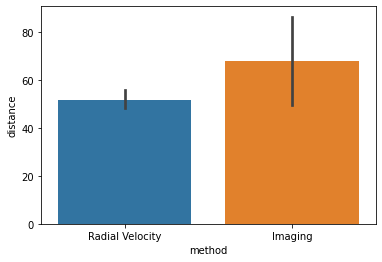

In [0]:
sns.barplot(x='method', y='distance', data=short)

In [0]:
radial_velocity = planets[planets['method']=='Radial Velocity']
imaging = planets[planets['method']=='Imaging']

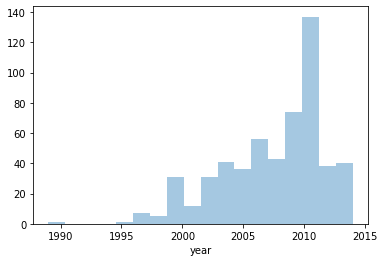

In [0]:
sns.distplot(radial_velocity['year'], kde=False)

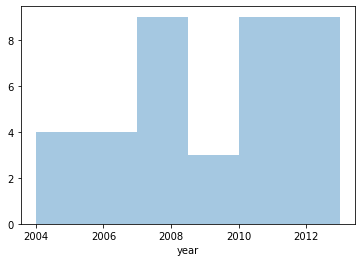

In [0]:
sns.distplot(imaging['year'], kde=False)

**conclusion**
- Depending on the distance the most effective method to find the planets varies. Most of far away planets were found by microlensing and most of nearby planets were found by radial velocity. Although the imaging method was started to be used more recently, the radial velocity method has been far more efficient. 

# Group Discussion

- share your homework results with others in the groups
- The above conclusion is intensionally **wrong**. What is still missing? What would you still visualize and validate more?

# Checklist

**Question! Question! Question!**
- Can I answer my question using my dataset? What is missing? Can I extract a new feature to answer my question? How can I even collect more data to answer my question?
- Is my conclusion right? What is still not validated or should be checked? Can I dig deeper? Do I have enough domain knowledge to ask and answer a right question?

# What is **wrong** with the conclusion?

1. Are we sure if the microlensing method has been most effective for the far-away planets?
 - Is just to see the quantile enough to understand actual counts? No
 - one should actually compare the counts of the transit method and the microlensing methods to be sure that microlensing is most effective for long distance.

2. Are we sure if the radial velocity is most effective recent years for the planets nearby? 
 - Is it right to compare the whole histogram directly between radial velocity and imaging to conclude that radial velocity is most effective for the planets nearby? 
 - the histogram was displayed only by years regardless of the distances of the planets

3. There can be maybe some more flaws that I did notice ...

Let's start with 1. We first filter the discovery of far-away planets from the transit method and the microlensing method.
We assume the planets with the distance 2000 or greater are far-away planets.
(You can change the definition as you want.) 

Text(0.5, 0.98, 'left: transit right: microlensing')

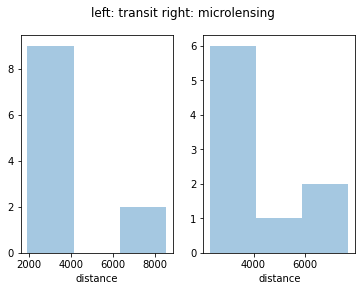

In [27]:
transit_far_away = planets[(planets['method']=='Transit') & (planets['distance'] > 1900.0)]
microlensing_far_away = planets[(planets['method']=='Microlensing') & (planets['distance'] > 1900.0)]

f, axes = plt.subplots(1, 2)

ax = sns.distplot(transit_far_away['distance'], kde=False, ax=axes[0], bins=3)
ax = sns.distplot(microlensing_far_away['distance'], kde=False, ax=axes[1], bins=3)
f.suptitle('left: transit right: microlensing')

Actually the transit and the microlensing methods  are showing actually quite similar performance or the transit is doing a little bit better. The previous conclusion about the microlensing was drawn too hastly. 

Let's try a similar exercise for 2. We define again recent years as after 2012.

78 9


Text(0.5, 0.98, 'left: radial_velocity right: imaging')

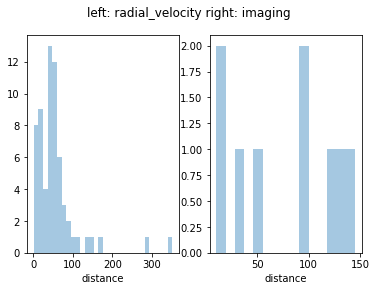

In [31]:
radial_velocity_recent = planets[(planets['method']=='Radial Velocity') & (planets['year'] >= 2012)]
imaging_recent = planets[(planets['method']=='Imaging') & (planets['year'] >= 2012)]

f, axes = plt.subplots(1, 2)

ax = sns.distplot(radial_velocity_recent['distance'], kde=False, ax=axes[0], bins=30)
ax = sns.distplot(imaging_recent['distance'], kde=False, ax=axes[1], bins=15)
f.suptitle('left: radial_velocity right: imaging')

Fortunately the conclusion is still right: the radial velocity was most effective methods for discoverying far-away planets recent years because the number of discoveries by radial velocity is significantly more. We need to be still careful before drawing the conclusion. 